In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.offline as pyo

In [3]:
#NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\KAREN J
[nltk_data]     FERNANDES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv(r'C:\Users\KAREN J FERNANDES\anaconda3\Files\IMDb Analysis\imdb_processed.csv')

In [5]:
df.head()

Unnamed: 0                                              title    year  \
0           0                                    Dinosaur Planet  2003.0   
1           1                                  Get Up and Dance!  1994.0   
2           2                                              8 Man  1992.0   
3           3                       What the #$*! Do We (K)now!?  2004.0   
4           4  Class of Nuke 'Em High Part II: Subhumanoid Me...  1991.0   

             kind                                              genre  rating  \
0  tv mini series             ['Documentary', 'Animation', 'Family']     7.7   
1     video movie                                         ['Family']     8.1   
2           movie                               ['Action', 'Sci-Fi']     5.5   
3           movie  ['Documentary', 'Comedy', 'Drama', 'Fantasy', ...     5.3   
4           movie                     ['Comedy', 'Horror', 'Sci-Fi']     4.5   

      vote            country                          language  \
0    474.0  ['United States']                       ['English']   
1     18.0  ['United States']                       ['English']   
2     93.0          ['Japan']                      ['Japanese']   
3  13432.0  ['United States']  ['English', 'German', 'Spanish']   
4   2177.0  ['United States']                       ['English']   

                                                cast  \
0              ['Christian Slater', 'Scott Sampson']   
1  ['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...   
2  ['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...   
3  ['Marlee Matlin', 'Elaine Hendrix', 'John Ross...   
4  ['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...   

                                            director                composer  \
0                                                NaN                     NaN   
1                                  ['Steve Purcell']                     NaN   
2                              ['Yasuhiro Horiuchi']         ['Carole King']   
3  ['William Arntz', 'Betsy Chasse', 'Mark Vicente']  ['Christopher Franke']   
4                                    ['Eric Louzil']         ['Bob Mithoff']   

                                              writer  runtime  
0   ['Mike Carrol', 'Mike Carroll', 'Georgann Kane']     50.0  
1                                                NaN     83.0  
2  ['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']      NaN  
3  ['William Arntz', 'Betsy Chasse', 'Matthew Hof...     60.0  
4     ['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']     96.0

## Data Pre-processing

In [6]:
#view the list of columns
df.columns

Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')

In [7]:
#dropping unnamed column
df = df.drop("Unnamed: 0",axis=1)

In [8]:
df.shape

(8451, 13)

In [9]:
#check for no of duplicates present
len(df)-len(df.drop_duplicates())

23

In [10]:
#Dropping duplicates based on title column
df = df.drop_duplicates('title').sort_index()

In [11]:
df.shape

(8078, 13)

In [12]:
#check for any nulls
df.isnull().any()

title       False
year        False
kind        False
genre        True
rating       True
vote         True
country      True
language     True
cast         True
director     True
composer     True
writer       True
runtime      True
dtype: bool

In [13]:
#replacing Nan with Missing in string columns
df[['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']] = df[['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']].fillna('Missing')

In [14]:
#replacing Nan with 0 in numeric columns
df[['rating', 'vote', 'runtime']] = df[['rating', 'vote', 'runtime']].fillna('0')

In [15]:
#check for any nulls
df.isnull().any()

title       False
year        False
kind        False
genre       False
rating      False
vote        False
country     False
language    False
cast        False
director    False
composer    False
writer      False
runtime     False
dtype: bool

In [16]:
#check datatypes
df.dtypes

title        object
year        float64
kind         object
genre        object
rating       object
vote         object
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime      object
dtype: object

In [17]:
#converting 'year' from float to int
df['year'] = df['year'].astype(int)
df['rating'] = df['rating'].astype(float)

In [18]:
#check datatypes
df.dtypes

title        object
year          int32
kind         object
genre        object
rating      float64
vote         object
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime      object
dtype: object

In [19]:
#remove brackets from genre, country, language, director, cast and writer columns
df['genre'] = df['genre'].str.strip('[]')
df['country'] = df['country'].str.strip('[]')
df['language'] = df['director'].str.strip('[]')
df['director'] = df['director'].str.strip('[]')
df['cast'] = df['cast'].str.strip('[]')
df['writer'] = df['writer'].str.strip('[]')

In [20]:
#remove quotes from genre, country, language, director, cast, writer columns
df['genre'] = df['genre'].str.replace(r"\'","", regex=True)
df['country'] = df['country'].str.replace(r"\'","", regex=True)
df['language'] = df['language'].str.replace(r"\'","", regex=True)
df['director'] = df['director'].str.replace(r"\'","", regex=True)
df['cast'] = df['cast'].str.replace(r"\'","", regex=True)
df['writer'] = df['writer'].str.replace(r"\'","", regex=True)

In [21]:
#splitting the genre column into sub-categories. Only the first genre category will be considered for this analysis.
N = 8

df[[f'genre {x+1}' for x in range(N)]] = (
    df['genre'].str.split(',', n=N+1, expand=True).iloc[:, :N])

In [22]:
df.head()

title  year            kind  \
0                                    Dinosaur Planet  2003  tv mini series   
1                                  Get Up and Dance!  1994     video movie   
2                                              8 Man  1992           movie   
3                       What the #$*! Do We (K)now!?  2004           movie   
4  Class of Nuke 'Em High Part II: Subhumanoid Me...  1991           movie   

                                               genre  rating     vote  \
0                     Documentary, Animation, Family     7.7    474.0   
1                                             Family     8.1     18.0   
2                                     Action, Sci-Fi     5.5     93.0   
3  Documentary, Comedy, Drama, Fantasy, Mystery, ...     5.3  13432.0   
4                             Comedy, Horror, Sci-Fi     4.5   2177.0   

         country                                   language  \
0  United States                                    Missing   
1  United States                              Steve Purcell   
2          Japan                          Yasuhiro Horiuchi   
3  United States  William Arntz, Betsy Chasse, Mark Vicente   
4  United States                                Eric Louzil   

                                                cast  \
0                    Christian Slater, Scott Sampson   
1  Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...   
2  Kai Shishido, Etsushi Takahashi, Sachiko Ayase...   
3  Marlee Matlin, Elaine Hendrix, John Ross Bowie...   
4  Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...   

                                    director  ...  \
0                                    Missing  ...   
1                              Steve Purcell  ...   
2                          Yasuhiro Horiuchi  ...   
3  William Arntz, Betsy Chasse, Mark Vicente  ...   
4                                Eric Louzil  ...   

                                         writer runtime      genre 1  \
0      Mike Carrol, Mike Carroll, Georgann Kane    50.0  Documentary   
1                                       Missing    83.0       Family   
2     Kazumasa Hirai, Jirô Kuwata, Junko Suzuki       0       Action   
3  William Arntz, Betsy Chasse, Matthew Hoffman    60.0  Documentary   
4        Lloyd Kaufman, Carl Morano, Matt Unger    96.0       Comedy   

      genre 2  genre 3   genre 4   genre 5  genre 6 genre 7 genre 8  
0   Animation   Family      None      None     None    None    None  
1        None     None      None      None     None    None    None  
2      Sci-Fi     None      None      None     None    None    None  
3      Comedy    Drama   Fantasy   Mystery   Sci-Fi    None    None  
4      Horror   Sci-Fi      None      None     None    None    None  

[5 rows x 21 columns]

In [23]:
#rename columns
df.rename(columns = {'genre 1':'genre_1'}, inplace = True)
df.rename(columns = {'kind':'category'}, inplace = True)

In [24]:
df.columns

Index(['title', 'year', 'category', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime',
       'genre_1', 'genre 2', 'genre 3', 'genre 4', 'genre 5', 'genre 6',
       'genre 7', 'genre 8'],
      dtype='object')

In [25]:
df["category"].value_counts()

movie             4867
video movie       1253
tv movie           732
episode            507
tv series          457
tv mini series     234
video game          18
tv short            10
Name: category, dtype: int64

In [26]:
#replacing 'tv mini series' to 'tv series' and 'tv movies', 'video movie' to 'movie'
df.replace(regex=r'tv mini series', value='tv series', inplace=True)
df.replace(regex=r'tv movie', value='movie', inplace=True)
df.replace(regex=r'video movie', value='movie', inplace=True)

In [27]:
df["category"].value_counts()

movie         6852
tv series      691
episode        507
video game      18
tv short        10
Name: category, dtype: int64

In [28]:
df.columns

Index(['title', 'year', 'category', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime',
       'genre_1', 'genre 2', 'genre 3', 'genre 4', 'genre 5', 'genre 6',
       'genre 7', 'genre 8'],
      dtype='object')

In [29]:
df.to_csv('cleaned_imdb_data.csv')

# Exploratory Data Analysis (EDA)

## Top 10 Best Perfoming Movies

In [30]:
#setting the theme for all the plots
sns.set_theme()

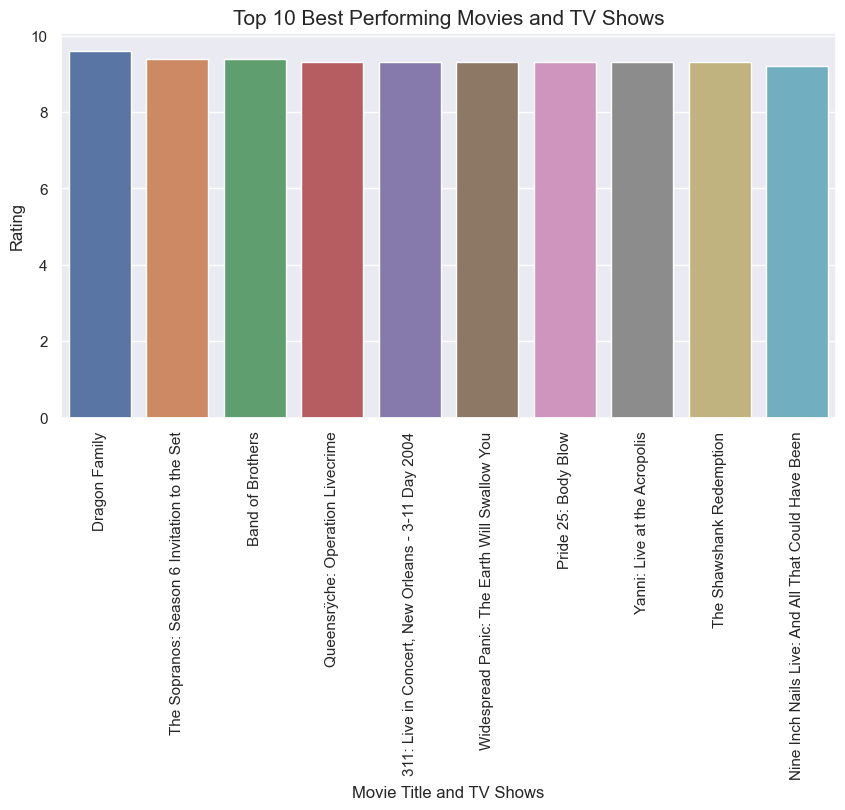

In [31]:
fig = plt.figure(figsize = (10, 5))
ax = sns.barplot(x = 'title', y = 'rating', data = df.sort_values('rating', ascending=False)[0:10])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Movie Title and TV Shows')
plt.ylabel('Rating')
plt.title('Top 10 Best Performing Movies and TV Shows', fontsize = 15)
plt.show()

## Distribution of Category

Text(0, 0.5, 'Count')

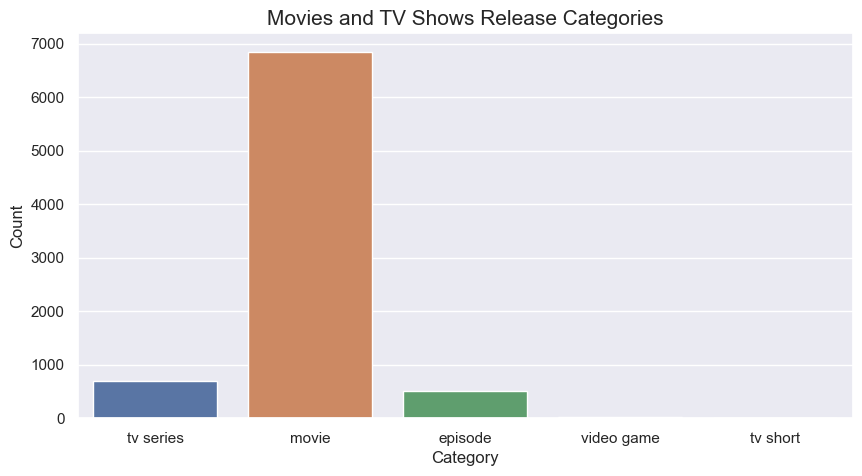

In [32]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = "category")
plt.title("Movies and TV Shows Release Categories", fontsize = 15)
plt.xlabel('Category')
plt.ylabel('Count')

## Genre with the most releases

In [33]:
pyo.init_notebook_mode()

fig_tree = px.treemap(df, path=[px.Constant("Distribution of Geners"),'genre_1'])
fig_tree.update_layout(title='Highest release in Geners',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

## Total number of releases each year

Text(0.5, 12.44444444444443, 'Year')

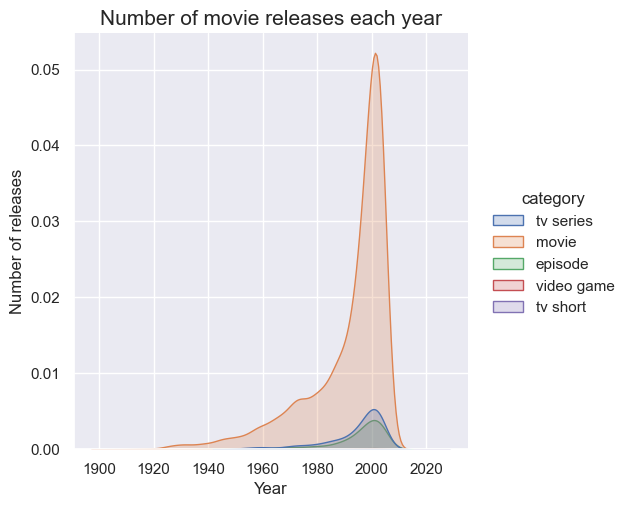

In [34]:
sns.displot(df, x="year", hue="category", kind="kde", fill=True)
plt.title("Number of movie releases each year", fontsize = 15)
plt.ylabel('Number of releases', fontsize = 12)
plt.xlabel('Year', fontsize = 12)

## Top 10 countries with most releases

In [35]:
df["countries"] = df["country"].apply(lambda x : True if x.find(',') != -1 else False)
df["countries"].value_counts()

False    6490
True     1588
Name: countries, dtype: int64

In [36]:
country_df = df.where(df['countries'] == False)['country'].value_counts().to_frame()
country_df.reset_index(inplace = True)
country_df.rename(columns = {"index" : "country", "country" : "count"}, inplace = True)
country_df.head(11)

country  count
0    United States   3613
1   United Kingdom    715
2            Japan    543
3          Missing    271
4            India    240
5           Canada    205
6        Hong Kong    205
7           France    153
8        Australia     78
9            Italy     65
10         Germany     45

Text(0.5, 0, 'Count')

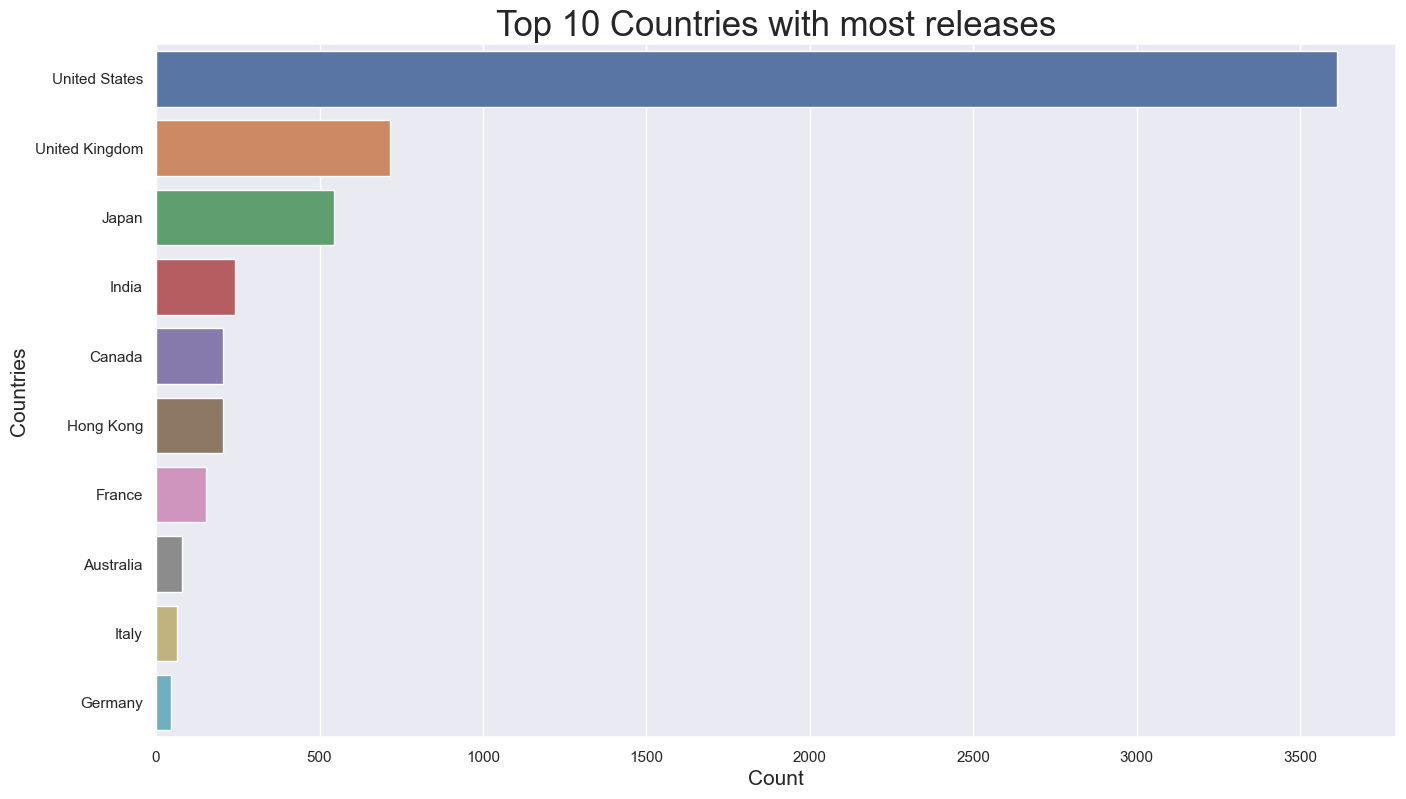

In [37]:
plt.figure(figsize = (16, 9))
plt.title("Top 10 Countries with most releases", fontsize = 25)
data = country_df[-(country_df.country == 'Missing')]
g = data.groupby('country', as_index=False)['count'].sum().sort_values(by='count', ascending=False).head(10)
ax = sns.barplot(data=g, y = 'country', x='count')
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

## Top 10 Directors

Text(0, 0.5, 'Directors')

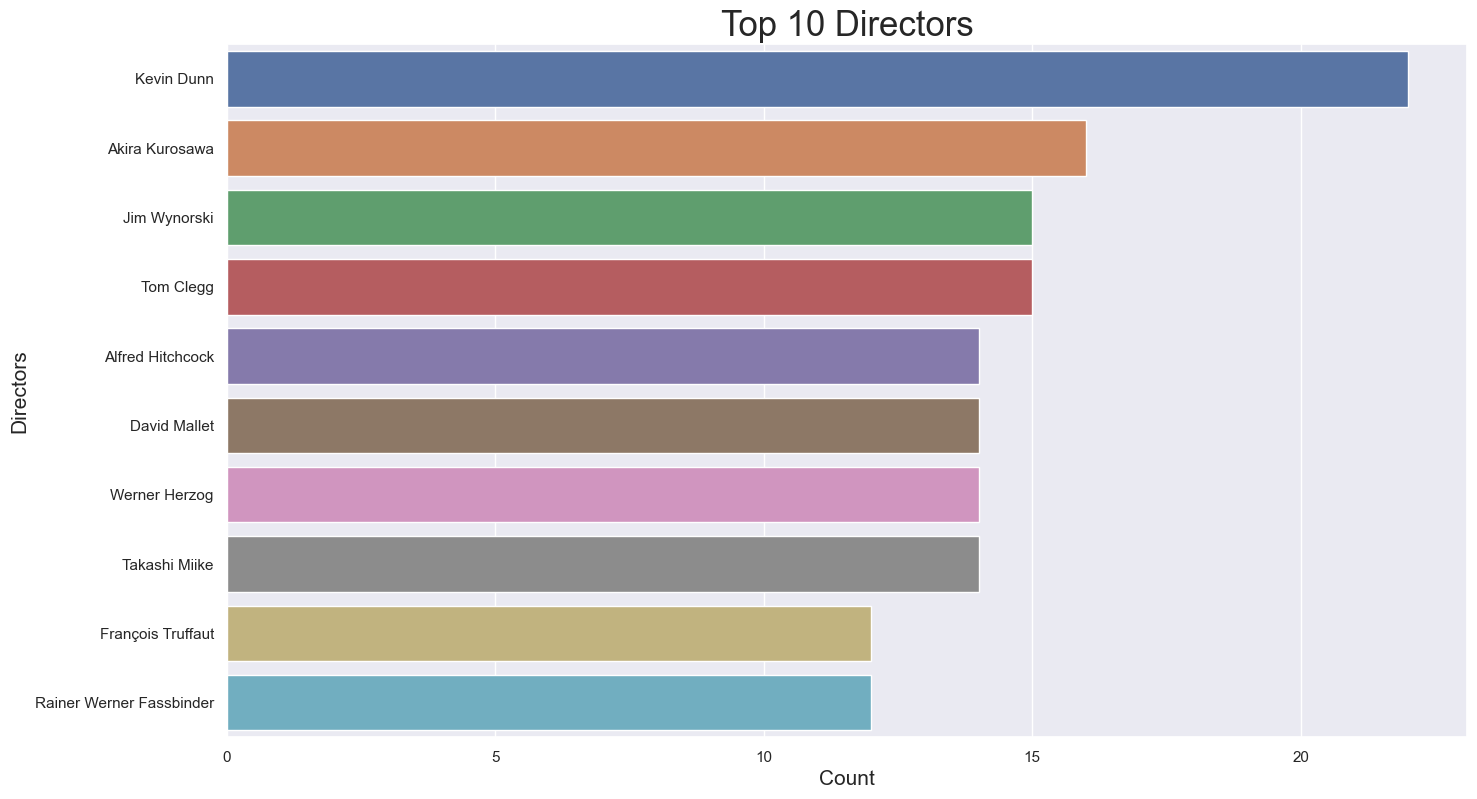

In [38]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(data = df[-(df.director == 'Missing')], y = 'director', order=df['director'].value_counts().index[1:11])
plt.title("Top 10 Directors", fontsize = 25)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Directors', fontsize = 15)

## Wordcloud for Cast

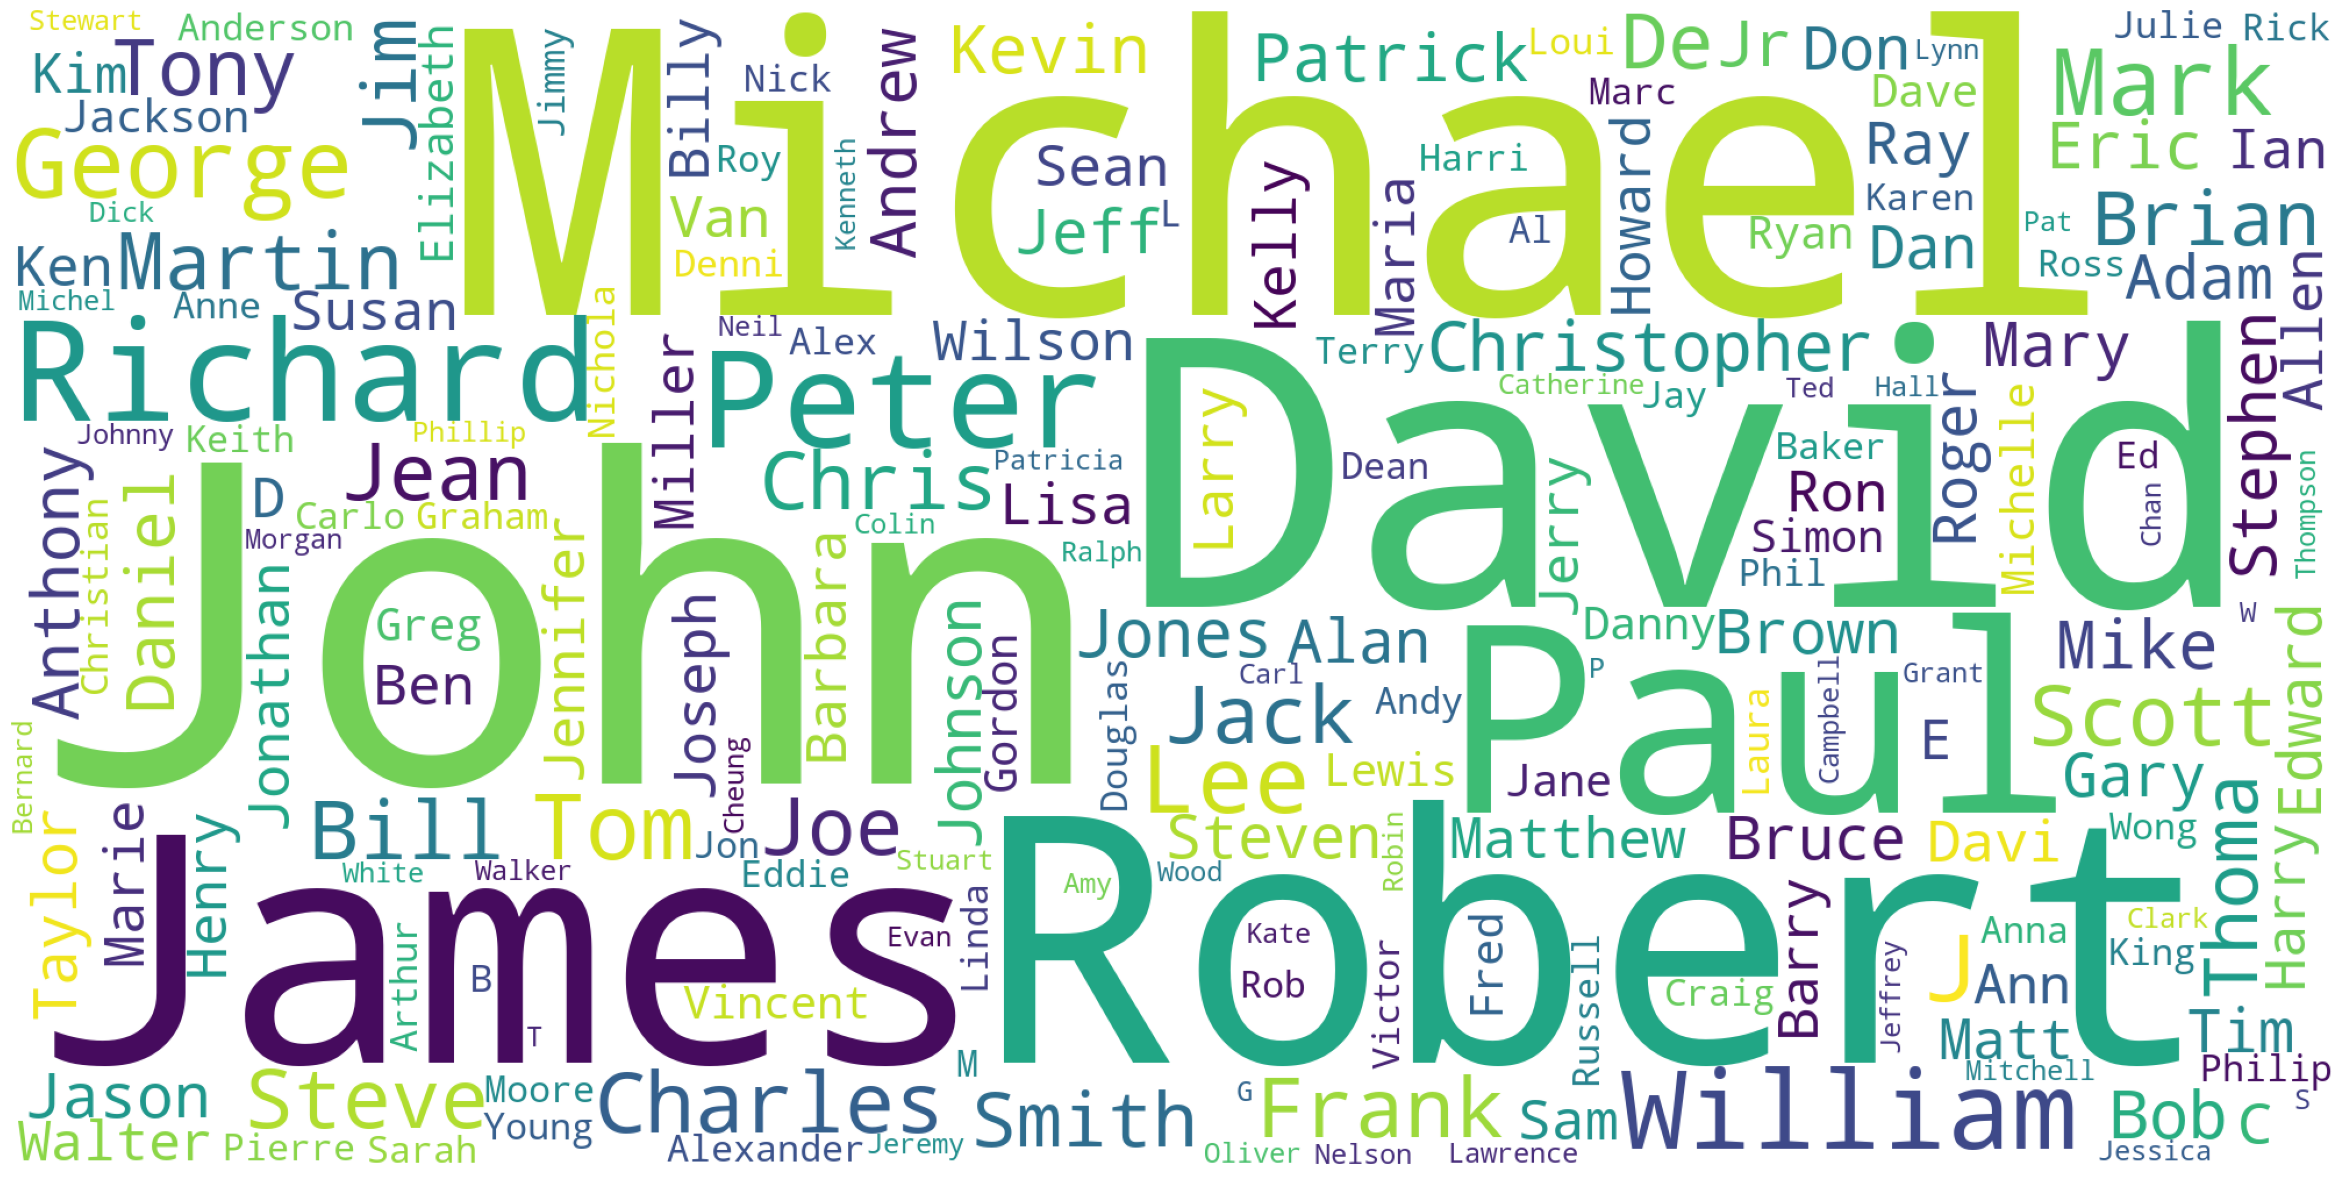

In [39]:
stop_words = set(stopwords.words('english'))
df['cast_no_stopwords'] = df['cast'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['cast_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)